In [1]:
# Machine Learning HW2 Ridge Regression

import matplotlib.pyplot as plt
import numpy as np

In [37]:
x, y = load_data_set("dataRidge.txt")
x.shape,y.shape
x_train, x_test, y_train, y_test = train_test_split(x, y, 0.8)
# a = np.arange(9).reshape(3,3)
# b = np.arange(3).reshape(3,1)
# x_train, x_test, y_train, y_test = train_test_split(a, b, 0.8)
# print(x_test)
# a=np.concatenate((x_test,x_train),axis=0)
# print(a)
# x_train, x_test, y_train, y_test = train_test_split(a, b, 0.8)
# print(x_test)
cross_validation(x_train, y_train, [0.2,0.3,1])

[46.74898636]
[33.60502862]
[32.34414127]
[-48.71858047]
[46.74898636]
[33.60502862]
[32.34414127]
[-48.71858047]
[46.74898636]
[33.60502862]
[32.34414127]
[-48.71858047]


(array([5.67994235, 5.14906918, 4.22617369]),
 array([1.10524079, 1.26487568, 1.93798789]))

In [38]:
# Parse the file and return 2 numpy arrays
def load_data_set(filename):
    # your code
    x = []
    y = []
    f = open(filename, 'r')
    for line in f:
        data = line.split()
        x.append(data[:-1]) #elements before the last column
        y.append(data[-1]) #the last element
    return np.array(x,dtype=float), np.array(y,dtype=float).reshape(-1,1)

# Split the data into train and test examples by the train_proportion
# i.e. if train_proportion = 0.8 then 80% of the examples are training and 20%
# are testing
def train_test_split(x, y, train_proportion):
    # your code
    x_sets = np.split(x,[int(x.shape[0]*train_proportion)],axis=0)
    y_sets = np.split(y,[int(y.shape[0]*train_proportion)],axis=0)
    x_train = x_sets[0]
    x_test = x_sets[1]
    y_train = y_sets[0]
    y_test = y_sets[1]
    return x_train, x_test, y_train, y_test

# Find theta using the modified normal equation
# Note: lambdaV is used instead of lambda because lambda is a reserved word in python
def normal_equation(x, y, lambdaV):
    # your code
    beta = np.linalg.inv(x.T.dot(x)+lambdaV*np.identity(x[0].shape[0],dtype=float)).dot(x.T.dot(y))
    return beta

# Extra Credit: Find theta using gradient descent
def gradient_descent(x, y, lambdaV, num_iterations, learning_rate):
    # your code
    return beta

# Given an array of y and y_predict return loss
def get_loss(y, y_predict):
    # your code
    loss = np.sum(np.square(y - y_predict)) / y.shape[0]
    return loss

# Given an array of x and theta predict y
def predict(x, theta):
    # your code
    y_predict = x.dot(theta)
    return y_predict

# Find the best lambda given x_train and y_train using 4 fold cv
def cross_validation(x_train, y_train, lambdas):
    valid_losses = []
    training_losses = []
    # your code
    for lambdaV in lambdas:
        trianing_loss = 0
        validation_loss = 0
        for i in range(4):
            # Split training and validation sets for cross validation
            x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 0.75)
            beta = normal_equation(x_train, y_train, lambdaV)
            y_train_pred = predict(x_train, beta)
            y_val_pred = predict(x_val,beta)
            trianing_loss += get_loss(y_train, y_train_pred)
            validation_loss += get_loss(y_val, y_val_pred)
            x_train,y_train = np.concatenate((x_val,x_train), axis = 0), np.concatenate((y_val,y_train), axis = 0)
            
        training_losses.append(trianing_loss/4)
        valid_losses.append(validation_loss/4)
        
    return np.array(valid_losses), np.array(training_losses)

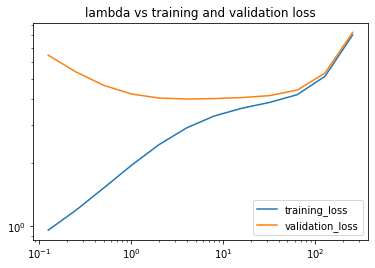

In [40]:
if __name__ == "__main__":

    # step 1
    # If we don't have enough data we will use cross validation to tune hyperparameter
    # instead of a training set and a validation set.
    x, y = load_data_set("dataRidge.txt") # load data
    x_train, x_test, y_train, y_test = train_test_split(x, y, 0.8)
    # Create a list of lambdas to try when hyperparameter tuning
    lambdas = [2**i for i in range(-3, 9)]
    lambdas.insert(0, 0)
    # Cross validate
    valid_losses, training_losses = cross_validation(x_train, y_train, lambdas)
    # Plot training vs validation loss
    plt.plot(lambdas[1:], training_losses[1:], label="training_loss") 
    # exclude the first point because it messes with the x scale
    plt.plot(lambdas[1:], valid_losses[1:], label="validation_loss")
    plt.legend(loc='best')
    plt.xscale("log")
    plt.yscale("log")
    plt.title("lambda vs training and validation loss")
    plt.show()

    best_lambda = lambdas[np.argmin(valid_losses)]

In [39]:



    # step 2: analysis 
    normal_beta = normal_equation(x_train, y_train, 0)
    best_beta = normal_equation(x_train, y_train, best_lambda)
    large_lambda_beta = normal_equation(x_train, y_train, 512)
    normal_beta_norm = # your code get l2 norm of normal_beta
    best_beta_norm = # your code get l2 norm of best_beta
    large_lambda_norm = # your code get l2 norm of large_lambda_beta
    print(best_lambda)
    print("L2 norm of normal beta:  " + str(normal_beta_norm))
    print("L2 norm of best beta:  " + str(best_beta_norm))
    print("L2 norm of large lambda beta:  " + str(large_lambda_norm))
    print("Average testing loss for normal beta:  " + str(get_loss(y_test, predict(x_test, normal_beta))))
    print("Average testing loss for best beta:  " + str(get_loss(y_test, predict(x_test, best_beta))))
    print("Average testing loss for large lambda beta:  " + str(get_loss(y_test, predict(x_test, large_lambda_beta))))
    bar_plot(best_beta)


    # Step3: Retrain a new model using all sampling in training, then report error on testing set
    # your code ! 


    # Step Extra Credit: Implement gradient descent, analyze and show it gives the same or very similar beta to normal_equation
    # to prove that it works



SyntaxError: invalid syntax (<ipython-input-39-b8cc36f71782>, line 30)